### Keras API Task

In [2]:
from tensorflow.keras.datasets import mnist
(train_image, train_targets), (test_image, test_targets) = mnist.load_data()
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

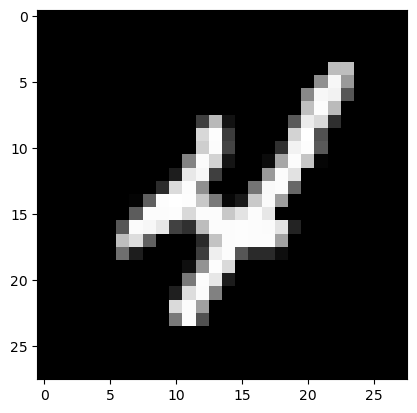

In [16]:
(train_image, train_targets), (test_image, test_targets) = mnist.load_data()
import matplotlib.pyplot as plt
plt.imshow(train_image[9], cmap='gray')
plt.show()

In [25]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()
print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [26]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

# 전부 Dense layer라고 부른다.
# 학습할 데이터가 많으면 neuron의 개수를 더 많이 지정(예, 64, 128, 256 등)하거나
# 은닉층 수를 더 늘리면 된다.
# 학습할 데이터가 적으면 neuron의 개수 또는 은닉층 수를 줄이는 것이 좋다.
model = Sequential([
    # 전체 28 * 28(784)개의 feature로 flatten 진행
    # 첫 번째 Input Layer
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    
    # 두 번째 Hidden Layer
    Dense(64, activation='relu'),
    
    # 세 번째 Hidden Layer
    Dense(128, activation='relu'),
    
    # 마지막 Output Layer
    Dense(10, activation='softmax')
])

# 파라미터 수 = (입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수
# 이 파라미터 수에는 편향(bias) 파라미터도 포함되어여
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
from tensorflow.keras.utils import to_categorical

train_oh_targets = to_categorical(train_targets)
test_oh_targets = to_categorical(test_targets)

print(train_oh_targets.shape, test_oh_targets.shape)

(60000, 10) (10000, 10)


In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [29]:
history = model.fit(x=train_images, y=train_oh_targets, batch_size=64, epochs=20)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.7569 - loss: 5.4466
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.8964 - loss: 0.4110
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.9208 - loss: 0.3080
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.9326 - loss: 0.2678
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9394 - loss: 0.2384
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.9479 - loss: 0.2029
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9523 - loss: 0.1815
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9565 - loss: 0.1645
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step - accuracy: 0.9607 - loss: 0.1427
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.9679 - loss: 0.1183
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.9674 - loss: 0.1202
Epoch 12/20
938/938 ━━━━━━━━━━━

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

train_oh_targets = to_categorical(train_targets)
validation_oh_targets = to_categorical(validation_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)


In [31]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\HANSUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    validation_data=(validation_images, validation_oh_targets), 
                    batch_size=32,
                    epochs=20,
                    verbose=4)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


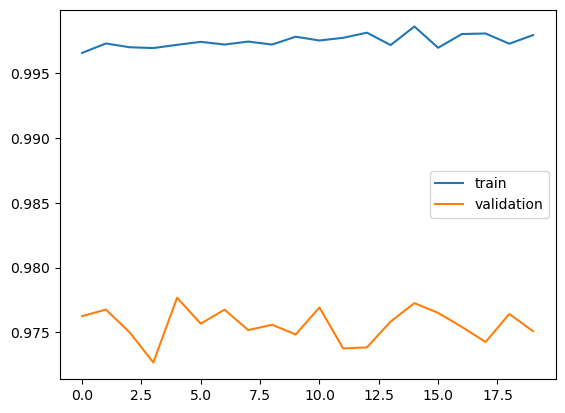

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


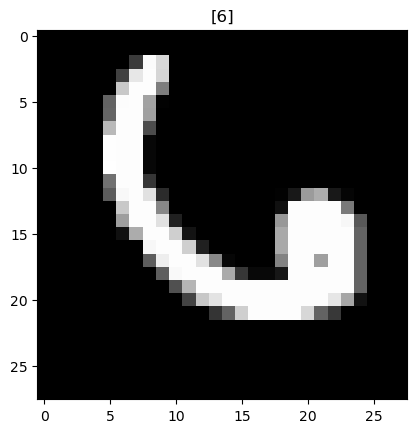

In [75]:
import numpy as np

a = test_images[9494]

pred_prob = model.predict(np.expand_dims(a, axis=0))
print(pred_prob)

plt.imshow(a, cmap='gray')
plt.title([pred_prob.flatten().argsort()[::-1][0]])
plt.show()

### Functional

In [50]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(64, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    return model

In [84]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [85]:
from tensorflow.keras.datasets import mnist

(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [89]:
pip install keras-tuner

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/129.1 kB ? eta -:--:--
   ------------------- -------------------- 61.4/129.1 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 129.1/129.1 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [87]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import numpy as np

# 하이퍼파라미터 튜닝을 위한 모델 구성 함수 정의
def build_model(hp):
    model = Sequential([
        Conv2D(filters=hp.Choice('filters', values=[32, 64], default=64), 
               kernel_size=(3, 3), 
               activation='relu', 
               input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Keras Tuner를 사용하여 하이퍼파라미터 튜닝
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='mnist_tuning')

# 데이터 차원 확장 (채널 차원 추가)
train_images = np.expand_dims(train_images, -1)
validation_images = np.expand_dims(validation_images, -1)
test_images = np.expand_dims(test_images, -1)

tuner.search(train_images, train_oh_targets, epochs=5, validation_data=(validation_images, validation_oh_targets))

# 최적의 하이퍼파라미터 출력
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters is {best_hps.get('filters')} and
the optimal number of units is {best_hps.get('units')}.
""")

# 최적의 하이퍼파라미터로 모델 훈련
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_oh_targets, epochs=5, validation_data=(validation_images, validation_oh_targets))

# 결과 시각화
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

ModuleNotFoundError: No module named 'kerastuner'

In [58]:
model = create_model()
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,850 (233.79 KB)

 Trainable params: 59,850 (233.79 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(0.001), loss=CategoricalCrossentropy(), metrics=['acc'])

In [81]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9979 - loss: 0.0105 - val_acc: 0.9779 - val_loss: 0.3674
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9984 - loss: 0.0107 - val_acc: 0.9763 - val_loss: 0.3936
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9989 - loss: 0.0064 - val_acc: 0.9760 - val_loss: 0.3684
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9992 - loss: 0.0031 - val_acc: 0.9764 - val_loss: 0.3857
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9986 - loss: 0.0063 - val_acc: 0.9765 - val_loss: 0.3524
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9986 - loss: 0.0064 - val_acc: 0.9749 - val_loss: 0.4124
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9991 - loss: 0.0036 - val_acc: 0.9749 - val_loss: 0.4146
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9989 - loss: 0.0064 - val_acc: 0.9754 - val_loss: 0.3952
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━

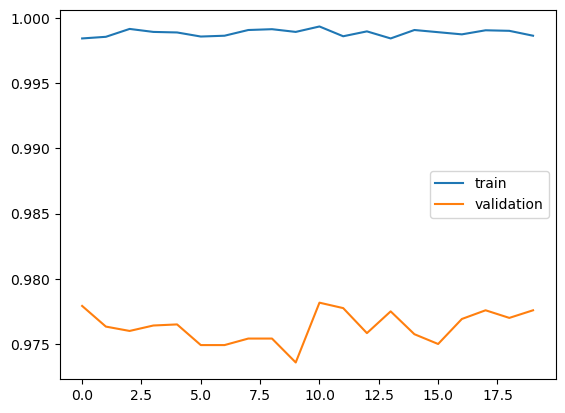

In [82]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from kerastuner.tuners import BayesianOptimization

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                    activation='relu'))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                    activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='bayesian_optimization')

# 데이터 로드 및 전처리 (예: MNIST 데이터셋)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

tuner.search(train_images, train_labels, epochs=5, validation_split=0.2)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of units in the first dense layer is {best_hps.get('units_1')} and
the optimal number of units in the second dense layer is {best_hps.get('units_2')}.
""")

# 최적의 하이퍼파라미터로 모델 훈련
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

# 결과 시각화
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.legend()
    plt.show()

show_history(history)


ModuleNotFoundError: No module named 'kerastuner'